In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('sequence_with_lag_features_cancel_out_total_amount.csv')  
df['is_holiday'] = df['is_holiday'].replace({False: 0, True: 1})
df['1y_holiday_diff'] = df['1y_holiday_diff'].fillna(0)
df['lag_1_spending'] = df['lag_1_spending'].fillna(0)
df['lag_2_spending'] = df['lag_2_spending'].fillna(0)
df['lag_3_spending'] = df['lag_3_spending'].fillna(0)
df['lag_5_spending'] = df['lag_5_spending'].fillna(0)
df['lag_6_spending'] = df['lag_6_spending'].fillna(0)
df['lag_7_spending'] = df['lag_7_spending'].fillna(0)
df['lag_9_spending'] = df['lag_9_spending'].fillna(0)
df['lag_11_spending'] = df['lag_11_spending'].fillna(0)
df['lag_12_spending'] = df['lag_12_spending'].fillna(0)
df.head(10)

C:\Users\Suzreal\AppData\Local\Temp\ipykernel_14912\2815772411.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_holiday'] = df['is_holiday'].replace({False: 0, True: 1})


,user_id,year_month,total_expense,txn_count_prev,total_expense_prev,mean_amount,user_gender,user_current_age,user_yearly_income,user_per_capita_income,...,lag_2_spending,lag_3_spending,lag_5_spending,lag_6_spending,lag_7_spending,lag_9_spending,lag_11_spending,lag_12_spending,1y_holiday_diff,is_holiday
0,0,2015-01-01,5249.9,128.0,6185.2,53.0,0,33,59613.0,29237.0,...,3859.24,6766.18,4266.63,6777.58,6604.68,5055.62,5109.56,6169.59,-1252.72,1
1,0,2015-02-01,4229.7,99.0,5249.9,49.2,0,33,59613.0,29237.0,...,7091.15,3859.24,5642.49,4266.63,6777.58,7068.70,4600.44,5109.56,-739.90,1
2,0,2015-03-01,4595.4,86.0,4229.7,45.5,0,33,59613.0,29237.0,...,4916.87,7091.15,6766.18,5642.49,4266.63,6604.68,5055.62,4600.44,0.00,0
3,0,2015-04-01,4586.5,101.0,4595.4,47.8,0,33,59613.0,29237.0,...,4369.66,4916.87,3859.24,6766.18,5642.49,6777.58,7068.70,5055.62,0.00,0
4,0,2015-05-01,5864.1,96.0,4586.5,50.6,0,33,59613.0,29237.0,...,5495.42,4369.66,7091.15,3859.24,6766.18,4266.63,6604.68,7068.70,-1420.57,1
5,0,2015-06-01,6104.9,116.0,5864.1,57.6,0,33,59613.0,29237.0,...,4938.54,5495.42,4916.87,7091.15,3859.24,5642.49,6777.58,6604.68,0.00,0
6,0,2015-07-01,5504.0,106.0,6104.9,59.8,0,33,59613.0,29237.0,...,5648.13,4938.54,4369.66,4916.87,7091.15,6766.18,4266.63,6777.58,-1133.53,1
7,0,2015-08-01,5029.5,92.0,5504.1,48.8,0,33,59613.0,29237.0,...,5886.93,5648.13,5495.42,4369.66,4916.87,3859.24,5642.49,4266.63,0.00,0
8,0,2015-09-01,5329.9,103.0,5029.5,56.7,0,33,59613.0,29237.0,...,5644.05,5886.93,4938.54,5495.42,4369.66,7091.15,6766.18,5642.49,67.42,1
9,0,2015-10-01,6071.2,94.0,5329.9,58.9,0,33,59613.0,29237.0,...,5029.51,5644.05,5648.13,4938.54,5495.42,4916.87,3859.24,6766.18,-495.02,1


In [3]:
df['year_month'] = pd.to_datetime(df['year_month'])
df = df.rename(columns={'total_expense': 'total_spending'})  

'''
The new setup for datasets and dataloaders
'''

train_end = pd.Timestamp('2017-12-31')
val_end = pd.Timestamp('2018-12-31')
test_end = pd.Timestamp('2019-09-30')

train_mask = df['year_month'] <= train_end
val_mask = (df['year_month'] > train_end) & (df['year_month'] <= val_end)
test_mask = (df['year_month'] > val_end) & (df['year_month'] <= test_end)

train_df = df.loc[train_mask].copy()
val_df = df.loc[val_mask].copy()
test_df = df.loc[test_mask].copy()


print(len(train_df), len(val_df), len(test_df))


43305 14454 10852


In [4]:
from sklearn.preprocessing import StandardScaler

num_cols = ['total_expense_prev','user_yearly_income',
       'user_per_capita_income','user_credit_score', 'user_total_debt','income_per_card','lag_1_spending',
       'lag_2_spending', 'lag_3_spending', 'lag_5_spending', 'lag_6_spending',
       'lag_7_spending', 'lag_9_spending', 'lag_11_spending',
       'lag_12_spending'
]
# --- normalize ---
scaler = StandardScaler()
scaler.fit(train_df[num_cols])

df_scaled = df.copy()
df_scaled[num_cols] = scaler.transform(df_scaled[num_cols])

In [5]:
import torch
from torch.utils.data import Dataset

class TransactionDataset(Dataset):
    def __init__(self, df, feature_cols, user_col='user_id', date_col='year_month',
                 target_col='total_spending', window_size=12,
                 target_start=None, target_end=None):
        self.feature_cols = feature_cols
        self.user_col = user_col
        self.date_col = date_col
        self.target_col = target_col
        self.window_size = window_size
        self.samples = []


        ts = pd.to_datetime(target_start) if target_start is not None else None
        te = pd.to_datetime(target_end)   if target_end   is not None else None
        if ts is None: ts = df[date_col].min()
        if te is None: te = df[date_col].max()


        for _, g in df.groupby(user_col):
            '''
            We use previous 12 months of data to predict the target month, even if the history 
            crosses the train/val/test boundaries
            '''
            g = g.sort_values(date_col).reset_index(drop=True)
            Xmat = g[self.feature_cols].to_numpy(dtype=float)
            yvec = g[self.target_col].to_numpy(dtype=float)
            months = g[date_col].to_numpy()

            for i in range(window_size, len(g)):
                t_month = months[i]
                if t_month < ts or t_month > te:
                    continue
                X = Xmat[i-window_size:i]
                y = float(yvec[i])
                self.samples.append((X, y))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        X, y = self.samples[idx]
        return (
            torch.tensor(X, dtype=torch.float32),
            torch.tensor(y, dtype=torch.float32)
        )


In [6]:
import torch
import torch.nn as nn

class LSTMAmountPredictor(nn.Module):
    def __init__(self, num_features, hidden_dim=128, num_layers=2, dropout=0.1):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=num_features,   
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0
        )
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        # x: [batch, seq_len, num_features]
        out, _ = self.lstm(x)
        last_out = out[:, -1, :]  # [batch, hidden_dim]
        y_pred = self.fc(last_out)  # [batch, 1]
        return y_pred.squeeze(-1)


In [7]:
feature_cols = [
    'txn_count_prev','total_expense_prev',
       'user_gender', 'user_current_age', 'user_yearly_income',
       'user_per_capita_income', 'user_credit_score', 'user_total_debt',
       'user_birth_month', 'card_num_cards_issued', 'user_latitude',
       'user_longitude', 'year_to_retirement', 'debt_to_yearly_income_ratio',
       'income_per_card', 'multi_card_user', 'income_utilization_ratio',
       'credit_utilization_ratio', 'oldest_card_age_years',
       'weekend_spend_ratio', 'correlation_with_trend',
       'risk_of_default_score', 'risk_level', 'Cluster',
       'percentage_prev_monthly_expense_as_yearly',
       'percentage_prev_monthly_expense_as_capita', 'lag_1_spending',
       'lag_2_spending', 'lag_3_spending', 'lag_5_spending', 'lag_6_spending',
       'lag_7_spending', 'lag_9_spending', 'lag_11_spending',
       'lag_12_spending', '1y_holiday_diff', 'is_holiday'
]


'''
The new setup for datasets and dataloaders
'''
train_target_start= df['year_month'].min() + pd.offsets.MonthBegin(0)
train_target_end= train_end
val_target_start= train_end + pd.offsets.Day(1)
val_target_end= val_end
test_target_start= val_end + pd.offsets.Day(1)
test_target_end= test_end

In [8]:
from torch.utils.data import DataLoader
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

num_features = len(feature_cols)
model = LSTMAmountPredictor(num_features=num_features, hidden_dim=128, num_layers=2)
# hyperparam
BATCH_SIZE = 128
EPOCHS = 300
LR = 1e-3
PATIENCE = 20   

'''
The new setup for datasets and dataloaders
'''
train_dataset = TransactionDataset(
    df=df_scaled, feature_cols=feature_cols, window_size=12,
    target_start=train_target_start, target_end=train_target_end,
    target_col='total_spending'
)
val_dataset = TransactionDataset(
    df=df_scaled, feature_cols=feature_cols, window_size=12,
    target_start=val_target_start, target_end=val_target_end,
    target_col='total_spending'
)
test_dataset = TransactionDataset(
    df=df_scaled, feature_cols=feature_cols, window_size=12,
    target_start=test_target_start, target_end=test_target_end,
    target_col='total_spending'
)

test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=1e-5)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

best_val_loss = np.inf
patience_counter = 0


In [9]:
train_history = {"train_loss": [], "val_loss": [],"test_loss":[]}
for epoch in range(EPOCHS):
    model.train()
    train_losses = []
    for X, y in tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS} [Train]"):
        X, y = X.to(device), y.to(device)

        optimizer.zero_grad()
        preds = model(X).squeeze()  # (batch,)
        loss = criterion(preds, y)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

    avg_train_loss = np.mean(train_losses)

    model.eval()
    val_losses = []
    with torch.no_grad():
        for X, y in tqdm(val_loader, desc=f"Epoch {epoch+1}/{EPOCHS} [Val]"):
            X, y = X.to(device), y.to(device)
            preds = model(X).squeeze()
            loss = criterion(preds, y)
            val_losses.append(loss.item())

    avg_val_loss = np.mean(val_losses)
    test_losses = []
    with torch.no_grad():
        for X, y in tqdm(test_loader, desc=f"Epoch {epoch+1}/{EPOCHS} [Test]"):
            X, y = X.to(device), y.to(device)
            preds = model(X).squeeze()
            loss = criterion(preds, y)
            test_losses.append(loss.item())

    avg_test_loss = np.mean(test_losses)

    train_history["train_loss"].append(avg_train_loss)
    train_history["val_loss"].append(avg_val_loss)
    train_history["test_loss"].append(avg_test_loss)

    print(f"\n📘 Epoch {epoch+1:02d} | Train Loss: {avg_train_loss:.6f} | Val Loss: {avg_val_loss:.6f} | test Loss: {avg_test_loss:.6f}")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0
        torch.save(model.state_dict(), "best_lstm_model.pt")
        print(f"✅ Saved new best model (val_loss={best_val_loss:.6f})")
    else:
        patience_counter += 1
        print(f" No improvement ({patience_counter}/{PATIENCE})")
        if patience_counter >= PATIENCE:
            print("⏹️ Early stopping triggered")
            break



Epoch 1/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 505.21it/s]



📘 Epoch 01 | Train Loss: 21558453.751111 | Val Loss: 21302531.880531 | test Loss: 20957901.788235
✅ Saved new best model (val_loss=21302531.880531)


Epoch 2/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 496.02it/s]



📘 Epoch 02 | Train Loss: 21325023.715556 | Val Loss: 21073907.530973 | test Loss: 20730776.000000
✅ Saved new best model (val_loss=21073907.530973)


Epoch 3/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 436.25it/s]



📘 Epoch 03 | Train Loss: 21098477.275556 | Val Loss: 20851016.243363 | test Loss: 20509356.294118
✅ Saved new best model (val_loss=20851016.243363)


Epoch 4/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 490.84it/s]



📘 Epoch 04 | Train Loss: 20879562.506667 | Val Loss: 20631831.367257 | test Loss: 20291629.488235
✅ Saved new best model (val_loss=20631831.367257)


Epoch 5/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 457.48it/s]



📘 Epoch 05 | Train Loss: 20664972.675556 | Val Loss: 20415345.606195 | test Loss: 20076594.505882
✅ Saved new best model (val_loss=20415345.606195)


Epoch 6/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 486.33it/s]



📘 Epoch 06 | Train Loss: 20448119.115556 | Val Loss: 20201652.008850 | test Loss: 19864344.341176
✅ Saved new best model (val_loss=20201652.008850)


Epoch 7/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 399.89it/s]



📘 Epoch 07 | Train Loss: 20232340.275556 | Val Loss: 19990086.672566 | test Loss: 19654218.688235
✅ Saved new best model (val_loss=19990086.672566)


Epoch 8/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 484.22it/s]



📘 Epoch 08 | Train Loss: 20025368.395556 | Val Loss: 19780991.942478 | test Loss: 19446558.188235
✅ Saved new best model (val_loss=19780991.942478)


Epoch 9/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 496.28it/s]



📘 Epoch 09 | Train Loss: 19817326.177778 | Val Loss: 19573762.632743 | test Loss: 19240761.400000
✅ Saved new best model (val_loss=19573762.632743)


Epoch 10/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 486.38it/s]



📘 Epoch 10 | Train Loss: 19602140.351111 | Val Loss: 19368578.575221 | test Loss: 19037006.823529
✅ Saved new best model (val_loss=19368578.575221)


Epoch 11/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 156.69it/s]



📘 Epoch 11 | Train Loss: 19401153.231111 | Val Loss: 19165522.146018 | test Loss: 18835375.870588
✅ Saved new best model (val_loss=19165522.146018)


Epoch 12/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 180.29it/s]



📘 Epoch 12 | Train Loss: 19198159.608889 | Val Loss: 18964364.221239 | test Loss: 18635641.605882
✅ Saved new best model (val_loss=18964364.221239)


Epoch 13/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 213.07it/s]



📘 Epoch 13 | Train Loss: 18997700.755556 | Val Loss: 18765108.504425 | test Loss: 18437807.129412
✅ Saved new best model (val_loss=18765108.504425)


Epoch 14/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 233.61it/s]



📘 Epoch 14 | Train Loss: 18806915.017778 | Val Loss: 18567719.305310 | test Loss: 18241837.458824
✅ Saved new best model (val_loss=18567719.305310)


Epoch 15/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 239.31it/s]



📘 Epoch 15 | Train Loss: 18604588.511111 | Val Loss: 18371953.495575 | test Loss: 18047490.452941
✅ Saved new best model (val_loss=18371953.495575)


Epoch 16/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 191.72it/s]



📘 Epoch 16 | Train Loss: 18403972.702222 | Val Loss: 18178271.694690 | test Loss: 17855224.211765
✅ Saved new best model (val_loss=18178271.694690)


Epoch 17/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 170.13it/s]



📘 Epoch 17 | Train Loss: 18211053.786667 | Val Loss: 17986047.017699 | test Loss: 17664415.388235
✅ Saved new best model (val_loss=17986047.017699)


Epoch 18/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 180.79it/s]



📘 Epoch 18 | Train Loss: 18021632.302222 | Val Loss: 17795997.079646 | test Loss: 17475777.305882
✅ Saved new best model (val_loss=17795997.079646)


Epoch 19/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 165.63it/s]



📘 Epoch 19 | Train Loss: 17832022.080000 | Val Loss: 17607294.933628 | test Loss: 17288488.435294
✅ Saved new best model (val_loss=17607294.933628)


Epoch 20/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 173.35it/s]



📘 Epoch 20 | Train Loss: 17638510.457778 | Val Loss: 17420223.035398 | test Loss: 17102829.552941
✅ Saved new best model (val_loss=17420223.035398)


Epoch 21/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 159.37it/s]



📘 Epoch 21 | Train Loss: 17451782.484444 | Val Loss: 17234971.380531 | test Loss: 16918988.764706
✅ Saved new best model (val_loss=17234971.380531)


Epoch 22/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 167.01it/s]



📘 Epoch 22 | Train Loss: 17275007.742222 | Val Loss: 17051426.553097 | test Loss: 16736853.847059
✅ Saved new best model (val_loss=17051426.553097)


Epoch 23/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 168.43it/s]



📘 Epoch 23 | Train Loss: 17086547.648889 | Val Loss: 16869449.769912 | test Loss: 16556286.617647
✅ Saved new best model (val_loss=16869449.769912)


Epoch 24/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 190.46it/s]



📘 Epoch 24 | Train Loss: 16903356.386667 | Val Loss: 16689206.519912 | test Loss: 16377452.111765
✅ Saved new best model (val_loss=16689206.519912)


Epoch 25/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 166.07it/s]



📘 Epoch 25 | Train Loss: 16725380.604444 | Val Loss: 16510801.011062 | test Loss: 16200452.776471
✅ Saved new best model (val_loss=16510801.011062)


Epoch 26/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 209.44it/s]



📘 Epoch 26 | Train Loss: 16554144.368889 | Val Loss: 16333878.533186 | test Loss: 16024939.288235
✅ Saved new best model (val_loss=16333878.533186)


Epoch 27/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 215.27it/s]



📘 Epoch 27 | Train Loss: 16369039.826667 | Val Loss: 16158551.577434 | test Loss: 15851022.641176
✅ Saved new best model (val_loss=16158551.577434)


Epoch 28/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 540.39it/s]



📘 Epoch 28 | Train Loss: 16197298.902222 | Val Loss: 15984648.154867 | test Loss: 15678533.094118
✅ Saved new best model (val_loss=15984648.154867)


Epoch 29/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 541.74it/s]



📘 Epoch 29 | Train Loss: 16022781.320000 | Val Loss: 15812653.738938 | test Loss: 15507945.000000
✅ Saved new best model (val_loss=15812653.738938)


Epoch 30/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 509.86it/s]



📘 Epoch 30 | Train Loss: 15846423.115556 | Val Loss: 15642087.504425 | test Loss: 15338788.511765
✅ Saved new best model (val_loss=15642087.504425)


Epoch 31/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 467.63it/s]



📘 Epoch 31 | Train Loss: 15682595.831111 | Val Loss: 15473438.243363 | test Loss: 15171543.452941
✅ Saved new best model (val_loss=15473438.243363)


Epoch 32/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 436.11it/s]



📘 Epoch 32 | Train Loss: 15512375.644444 | Val Loss: 15306341.086283 | test Loss: 15005853.576471
✅ Saved new best model (val_loss=15306341.086283)


Epoch 33/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 434.14it/s]



📘 Epoch 33 | Train Loss: 15343204.031111 | Val Loss: 15140580.829646 | test Loss: 14841505.635294
✅ Saved new best model (val_loss=15140580.829646)


Epoch 34/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 483.78it/s]



📘 Epoch 34 | Train Loss: 15183401.986667 | Val Loss: 14976536.765487 | test Loss: 14678873.652941
✅ Saved new best model (val_loss=14976536.765487)


Epoch 35/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 481.70it/s]



📘 Epoch 35 | Train Loss: 15015453.600000 | Val Loss: 14814119.685841 | test Loss: 14517884.576471
✅ Saved new best model (val_loss=14814119.685841)


Epoch 36/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 420.97it/s]



📘 Epoch 36 | Train Loss: 14859177.262222 | Val Loss: 14653383.225664 | test Loss: 14358547.835294
✅ Saved new best model (val_loss=14653383.225664)


Epoch 37/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 350.83it/s]



📘 Epoch 37 | Train Loss: 14698003.991111 | Val Loss: 14494235.389381 | test Loss: 14200800.394118
✅ Saved new best model (val_loss=14494235.389381)


Epoch 38/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 513.41it/s]



📘 Epoch 38 | Train Loss: 14536985.973333 | Val Loss: 14336468.615044 | test Loss: 14044442.600000
✅ Saved new best model (val_loss=14336468.615044)


Epoch 39/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 488.47it/s]



📘 Epoch 39 | Train Loss: 14378631.446667 | Val Loss: 14179784.933628 | test Loss: 13889082.694118
✅ Saved new best model (val_loss=14179784.933628)


Epoch 40/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 480.04it/s]



📘 Epoch 40 | Train Loss: 14218464.188889 | Val Loss: 14024155.522124 | test Loss: 13735292.479412
✅ Saved new best model (val_loss=14024155.522124)


Epoch 41/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 400.93it/s]



📘 Epoch 41 | Train Loss: 14069692.737778 | Val Loss: 13870642.701327 | test Loss: 13583261.702941
✅ Saved new best model (val_loss=13870642.701327)


Epoch 42/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 529.37it/s]



📘 Epoch 42 | Train Loss: 13910577.302222 | Val Loss: 13718499.438053 | test Loss: 13432702.629412
✅ Saved new best model (val_loss=13718499.438053)


Epoch 43/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 483.82it/s]



📘 Epoch 43 | Train Loss: 13762445.968889 | Val Loss: 13568573.610619 | test Loss: 13284005.629412
✅ Saved new best model (val_loss=13568573.610619)


Epoch 44/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 467.22it/s]



📘 Epoch 44 | Train Loss: 13611192.995556 | Val Loss: 13419798.774336 | test Loss: 13136963.682353
✅ Saved new best model (val_loss=13419798.774336)


Epoch 45/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 475.93it/s]



📘 Epoch 45 | Train Loss: 13461754.753333 | Val Loss: 13272883.163717 | test Loss: 12991368.482353
✅ Saved new best model (val_loss=13272883.163717)


Epoch 46/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 462.94it/s]



📘 Epoch 46 | Train Loss: 13316238.024444 | Val Loss: 13127542.902655 | test Loss: 12847432.008824
✅ Saved new best model (val_loss=13127542.902655)


Epoch 47/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 389.71it/s]



📘 Epoch 47 | Train Loss: 13175192.040000 | Val Loss: 12983708.272124 | test Loss: 12705079.676471
✅ Saved new best model (val_loss=12983708.272124)


Epoch 48/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 498.10it/s]



📘 Epoch 48 | Train Loss: 13029662.322222 | Val Loss: 12841644.316372 | test Loss: 12564660.973529
✅ Saved new best model (val_loss=12841644.316372)


Epoch 49/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 486.30it/s]



📘 Epoch 49 | Train Loss: 12890006.135556 | Val Loss: 12701333.829646 | test Loss: 12425797.908824
✅ Saved new best model (val_loss=12701333.829646)


Epoch 50/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 489.46it/s]



📘 Epoch 50 | Train Loss: 12744780.960000 | Val Loss: 12562000.004425 | test Loss: 12288343.002941
✅ Saved new best model (val_loss=12562000.004425)


Epoch 51/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 467.47it/s]



📘 Epoch 51 | Train Loss: 12603219.984444 | Val Loss: 12425509.236726 | test Loss: 12152415.117647
✅ Saved new best model (val_loss=12425509.236726)


Epoch 52/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 410.50it/s]



📘 Epoch 52 | Train Loss: 12467769.017778 | Val Loss: 12288950.163717 | test Loss: 12017938.335294
✅ Saved new best model (val_loss=12288950.163717)


Epoch 53/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 500.98it/s]



📘 Epoch 53 | Train Loss: 12332382.044444 | Val Loss: 12154103.323009 | test Loss: 11884323.214706
✅ Saved new best model (val_loss=12154103.323009)


Epoch 54/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 462.78it/s]



📘 Epoch 54 | Train Loss: 12195676.857778 | Val Loss: 12021058.215708 | test Loss: 11752731.617647
✅ Saved new best model (val_loss=12021058.215708)


Epoch 55/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 491.79it/s]



📘 Epoch 55 | Train Loss: 12065484.402222 | Val Loss: 11889979.149336 | test Loss: 11623459.008824
✅ Saved new best model (val_loss=11889979.149336)


Epoch 56/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 453.11it/s]



📘 Epoch 56 | Train Loss: 11933497.395556 | Val Loss: 11759435.675885 | test Loss: 11493320.979412
✅ Saved new best model (val_loss=11759435.675885)


Epoch 57/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 455.12it/s]



📘 Epoch 57 | Train Loss: 11802373.451111 | Val Loss: 11630615.121681 | test Loss: 11365928.526471
✅ Saved new best model (val_loss=11630615.121681)


Epoch 58/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 500.92it/s]



📘 Epoch 58 | Train Loss: 11670985.984444 | Val Loss: 11502624.742257 | test Loss: 11239485.161765
✅ Saved new best model (val_loss=11502624.742257)


Epoch 59/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 467.66it/s]



📘 Epoch 59 | Train Loss: 11551005.062222 | Val Loss: 11376668.625000 | test Loss: 11114978.138235
✅ Saved new best model (val_loss=11376668.625000)


Epoch 60/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 509.76it/s]



📘 Epoch 60 | Train Loss: 11421052.793333 | Val Loss: 11251966.875000 | test Loss: 10991344.185294
✅ Saved new best model (val_loss=11251966.875000)


Epoch 61/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 535.86it/s]



📘 Epoch 61 | Train Loss: 11294151.315556 | Val Loss: 11128859.725664 | test Loss: 10869330.532353
✅ Saved new best model (val_loss=11128859.725664)


Epoch 62/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 436.20it/s]



📘 Epoch 62 | Train Loss: 11172992.035556 | Val Loss: 11007903.148230 | test Loss: 10750412.950000
✅ Saved new best model (val_loss=11007903.148230)


Epoch 63/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 467.14it/s]



📘 Epoch 63 | Train Loss: 11050818.022222 | Val Loss: 10886913.559735 | test Loss: 10630346.350000
✅ Saved new best model (val_loss=10886913.559735)


Epoch 64/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 452.65it/s]



📘 Epoch 64 | Train Loss: 10935264.960000 | Val Loss: 10767739.805310 | test Loss: 10512072.567647
✅ Saved new best model (val_loss=10767739.805310)


Epoch 65/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 375.60it/s]



📘 Epoch 65 | Train Loss: 10812240.977778 | Val Loss: 10650027.720133 | test Loss: 10396014.358824
✅ Saved new best model (val_loss=10650027.720133)


Epoch 66/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 477.94it/s]



📘 Epoch 66 | Train Loss: 10689041.946667 | Val Loss: 10534605.626106 | test Loss: 10281576.544118
✅ Saved new best model (val_loss=10534605.626106)


Epoch 67/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 455.30it/s]



📘 Epoch 67 | Train Loss: 10571701.951111 | Val Loss: 10422288.033186 | test Loss: 10169629.370588
✅ Saved new best model (val_loss=10422288.033186)


Epoch 68/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 467.10it/s]



📘 Epoch 68 | Train Loss: 10461637.726667 | Val Loss: 10304369.181416 | test Loss: 10054246.995588
✅ Saved new best model (val_loss=10304369.181416)


Epoch 69/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 495.07it/s]



📘 Epoch 69 | Train Loss: 10344208.535556 | Val Loss: 10191361.043142 | test Loss: 9941680.400000
✅ Saved new best model (val_loss=10191361.043142)


Epoch 70/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 467.54it/s]



📘 Epoch 70 | Train Loss: 10233523.195556 | Val Loss: 10081855.207965 | test Loss: 9833347.208824
✅ Saved new best model (val_loss=10081855.207965)


Epoch 71/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 462.53it/s]



📘 Epoch 71 | Train Loss: 10126556.124444 | Val Loss: 9971672.799779 | test Loss: 9724820.222059
✅ Saved new best model (val_loss=9971672.799779)


Epoch 72/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 517.26it/s]



📘 Epoch 72 | Train Loss: 10013664.868889 | Val Loss: 9863090.546460 | test Loss: 9617064.086765
✅ Saved new best model (val_loss=9863090.546460)


Epoch 73/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 457.67it/s]



📘 Epoch 73 | Train Loss: 9903456.306667 | Val Loss: 9755737.886062 | test Loss: 9511034.222059
✅ Saved new best model (val_loss=9755737.886062)


Epoch 74/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 483.86it/s]



📘 Epoch 74 | Train Loss: 9803016.900000 | Val Loss: 9649928.978982 | test Loss: 9405985.494118
✅ Saved new best model (val_loss=9649928.978982)


Epoch 75/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 492.49it/s]



📘 Epoch 75 | Train Loss: 9691320.357778 | Val Loss: 9547925.129425 | test Loss: 9304115.055882
✅ Saved new best model (val_loss=9547925.129425)


Epoch 76/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 481.07it/s]



📘 Epoch 76 | Train Loss: 9586390.397778 | Val Loss: 9442267.801991 | test Loss: 9202163.425000
✅ Saved new best model (val_loss=9442267.801991)


Epoch 77/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 442.94it/s]



📘 Epoch 77 | Train Loss: 9480223.028889 | Val Loss: 9341184.120575 | test Loss: 9099756.825000
✅ Saved new best model (val_loss=9341184.120575)


Epoch 78/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 493.96it/s]



📘 Epoch 78 | Train Loss: 9380476.986667 | Val Loss: 9238136.017699 | test Loss: 8999648.673529
✅ Saved new best model (val_loss=9238136.017699)


Epoch 79/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 457.54it/s]



📘 Epoch 79 | Train Loss: 9275459.455556 | Val Loss: 9139969.126106 | test Loss: 8901018.963235
✅ Saved new best model (val_loss=9139969.126106)


Epoch 80/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 503.86it/s]



📘 Epoch 80 | Train Loss: 9177559.971111 | Val Loss: 9041046.053097 | test Loss: 8803807.667647
✅ Saved new best model (val_loss=9041046.053097)


Epoch 81/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 472.86it/s]



📘 Epoch 81 | Train Loss: 9076168.311111 | Val Loss: 8942618.924779 | test Loss: 8706352.517647
✅ Saved new best model (val_loss=8942618.924779)


Epoch 82/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 453.19it/s]



📘 Epoch 82 | Train Loss: 8981366.513333 | Val Loss: 8847394.633850 | test Loss: 8611182.008824
✅ Saved new best model (val_loss=8847394.633850)


Epoch 83/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 525.64it/s]



📘 Epoch 83 | Train Loss: 8883330.257778 | Val Loss: 8750525.549779 | test Loss: 8518099.200000
✅ Saved new best model (val_loss=8750525.549779)


Epoch 84/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 465.05it/s]



📘 Epoch 84 | Train Loss: 8789213.366667 | Val Loss: 8657293.989491 | test Loss: 8424754.017647
✅ Saved new best model (val_loss=8657293.989491)


Epoch 85/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 395.31it/s]



📘 Epoch 85 | Train Loss: 8702231.300000 | Val Loss: 8565106.504425 | test Loss: 8334376.997059
✅ Saved new best model (val_loss=8565106.504425)


Epoch 86/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 507.65it/s]



📘 Epoch 86 | Train Loss: 8603433.283333 | Val Loss: 8471823.884956 | test Loss: 8242808.807353
✅ Saved new best model (val_loss=8471823.884956)


Epoch 87/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 470.82it/s]



📘 Epoch 87 | Train Loss: 8509455.662222 | Val Loss: 8380855.356195 | test Loss: 8150975.489706
✅ Saved new best model (val_loss=8380855.356195)


Epoch 88/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 508.52it/s]



📘 Epoch 88 | Train Loss: 8419960.213333 | Val Loss: 8290472.092367 | test Loss: 8063086.014706
✅ Saved new best model (val_loss=8290472.092367)


Epoch 89/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 483.21it/s]



📘 Epoch 89 | Train Loss: 8329439.223333 | Val Loss: 8203617.901549 | test Loss: 7976977.158824
✅ Saved new best model (val_loss=8203617.901549)


Epoch 90/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 462.90it/s]



📘 Epoch 90 | Train Loss: 8242608.465556 | Val Loss: 8116723.495575 | test Loss: 7892097.258824
✅ Saved new best model (val_loss=8116723.495575)


Epoch 91/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 480.86it/s]



📘 Epoch 91 | Train Loss: 8152271.602222 | Val Loss: 8027488.466814 | test Loss: 7803854.480882
✅ Saved new best model (val_loss=8027488.466814)


Epoch 92/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 470.09it/s]



📘 Epoch 92 | Train Loss: 8066883.180000 | Val Loss: 7942944.849004 | test Loss: 7719604.630882
✅ Saved new best model (val_loss=7942944.849004)


Epoch 93/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 385.04it/s]



📘 Epoch 93 | Train Loss: 7978879.352222 | Val Loss: 7857930.440265 | test Loss: 7636118.582353
✅ Saved new best model (val_loss=7857930.440265)


Epoch 94/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 491.98it/s]



📘 Epoch 94 | Train Loss: 7896857.116667 | Val Loss: 7774928.635509 | test Loss: 7553734.560294
✅ Saved new best model (val_loss=7774928.635509)


Epoch 95/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 467.43it/s]



📘 Epoch 95 | Train Loss: 7809639.476667 | Val Loss: 7693539.670354 | test Loss: 7472167.547794
✅ Saved new best model (val_loss=7693539.670354)


Epoch 96/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 501.47it/s]



📘 Epoch 96 | Train Loss: 7729690.646667 | Val Loss: 7610195.595133 | test Loss: 7390970.351471
✅ Saved new best model (val_loss=7610195.595133)


Epoch 97/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 491.87it/s]



📘 Epoch 97 | Train Loss: 7647124.357778 | Val Loss: 7529004.724004 | test Loss: 7311200.432353
✅ Saved new best model (val_loss=7529004.724004)


Epoch 98/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 392.09it/s]



📘 Epoch 98 | Train Loss: 7564642.648889 | Val Loss: 7456382.329093 | test Loss: 7241562.900735
✅ Saved new best model (val_loss=7456382.329093)


Epoch 99/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 501.38it/s]



📘 Epoch 99 | Train Loss: 7487260.873333 | Val Loss: 7373359.434735 | test Loss: 7157332.245588
✅ Saved new best model (val_loss=7373359.434735)


Epoch 100/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 469.05it/s]



📘 Epoch 100 | Train Loss: 7406268.311111 | Val Loss: 7293685.073562 | test Loss: 7079165.269118
✅ Saved new best model (val_loss=7293685.073562)


Epoch 101/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 508.76it/s]



📘 Epoch 101 | Train Loss: 7329200.278889 | Val Loss: 7219759.855642 | test Loss: 7001484.347059
✅ Saved new best model (val_loss=7219759.855642)


Epoch 102/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 422.11it/s]



📘 Epoch 102 | Train Loss: 7254857.647778 | Val Loss: 7142723.214602 | test Loss: 6930301.980882
✅ Saved new best model (val_loss=7142723.214602)


Epoch 103/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 427.21it/s]



📘 Epoch 103 | Train Loss: 7174517.224444 | Val Loss: 7066559.874447 | test Loss: 6852271.195588
✅ Saved new best model (val_loss=7066559.874447)


Epoch 104/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 449.26it/s]



📘 Epoch 104 | Train Loss: 7097252.435556 | Val Loss: 6993615.662611 | test Loss: 6781723.228676
✅ Saved new best model (val_loss=6993615.662611)


Epoch 105/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 418.50it/s]



📘 Epoch 105 | Train Loss: 7029460.472222 | Val Loss: 6919550.139381 | test Loss: 6709731.894118
✅ Saved new best model (val_loss=6919550.139381)


Epoch 106/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 512.70it/s]



📘 Epoch 106 | Train Loss: 6950313.414444 | Val Loss: 6846791.717367 | test Loss: 6634476.796324
✅ Saved new best model (val_loss=6846791.717367)


Epoch 107/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 464.54it/s]



📘 Epoch 107 | Train Loss: 6879504.007778 | Val Loss: 6774315.232854 | test Loss: 6564753.591176
✅ Saved new best model (val_loss=6774315.232854)


Epoch 108/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 462.60it/s]



📘 Epoch 108 | Train Loss: 6806315.955556 | Val Loss: 6703005.884403 | test Loss: 6493197.877206
✅ Saved new best model (val_loss=6703005.884403)


Epoch 109/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 482.10it/s]



📘 Epoch 109 | Train Loss: 6734559.963333 | Val Loss: 6634595.573009 | test Loss: 6426719.960294
✅ Saved new best model (val_loss=6634595.573009)


Epoch 110/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 450.21it/s]



📘 Epoch 110 | Train Loss: 6663301.797778 | Val Loss: 6569037.810288 | test Loss: 6362599.038971
✅ Saved new best model (val_loss=6569037.810288)


Epoch 111/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 411.89it/s]



📘 Epoch 111 | Train Loss: 6596171.982222 | Val Loss: 6498481.931416 | test Loss: 6291199.569118
✅ Saved new best model (val_loss=6498481.931416)


Epoch 112/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 516.30it/s]



📘 Epoch 112 | Train Loss: 6524217.447778 | Val Loss: 6437666.949668 | test Loss: 6226979.665441
✅ Saved new best model (val_loss=6437666.949668)


Epoch 113/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 475.65it/s]



📘 Epoch 113 | Train Loss: 6458028.918889 | Val Loss: 6366483.842367 | test Loss: 6160162.088971
✅ Saved new best model (val_loss=6366483.842367)


Epoch 114/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 505.93it/s]



📘 Epoch 114 | Train Loss: 6390097.054444 | Val Loss: 6298617.446903 | test Loss: 6092898.289706
✅ Saved new best model (val_loss=6298617.446903)


Epoch 115/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 446.86it/s]



📘 Epoch 115 | Train Loss: 6325496.848889 | Val Loss: 6237425.275996 | test Loss: 6035239.644118
✅ Saved new best model (val_loss=6237425.275996)


Epoch 116/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 408.51it/s]



📘 Epoch 116 | Train Loss: 6258199.881111 | Val Loss: 6175507.055863 | test Loss: 5968971.395588
✅ Saved new best model (val_loss=6175507.055863)


Epoch 117/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 482.96it/s]



📘 Epoch 117 | Train Loss: 6193289.794444 | Val Loss: 6106111.531250 | test Loss: 5904109.901471
✅ Saved new best model (val_loss=6106111.531250)


Epoch 118/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 452.33it/s]



📘 Epoch 118 | Train Loss: 6132872.938889 | Val Loss: 6048020.271571 | test Loss: 5844511.571324
✅ Saved new best model (val_loss=6048020.271571)


Epoch 119/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 516.09it/s]



📘 Epoch 119 | Train Loss: 6065811.350000 | Val Loss: 5982614.146571 | test Loss: 5780724.066912
✅ Saved new best model (val_loss=5982614.146571)


Epoch 120/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 472.14it/s]



📘 Epoch 120 | Train Loss: 6006416.105556 | Val Loss: 5921340.820243 | test Loss: 5722318.335294
✅ Saved new best model (val_loss=5921340.820243)


Epoch 121/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 480.09it/s]



📘 Epoch 121 | Train Loss: 5947578.243333 | Val Loss: 5858769.907633 | test Loss: 5660140.811765
✅ Saved new best model (val_loss=5858769.907633)


Epoch 122/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 513.28it/s]



📘 Epoch 122 | Train Loss: 5882709.147778 | Val Loss: 5799979.915653 | test Loss: 5602032.319118
✅ Saved new best model (val_loss=5799979.915653)


Epoch 123/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 484.36it/s]



📘 Epoch 123 | Train Loss: 5822582.783333 | Val Loss: 5744366.353706 | test Loss: 5549491.282353
✅ Saved new best model (val_loss=5744366.353706)


Epoch 124/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 426.60it/s]



📘 Epoch 124 | Train Loss: 5761205.823333 | Val Loss: 5687523.334347 | test Loss: 5488350.002206
✅ Saved new best model (val_loss=5687523.334347)


Epoch 125/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 501.06it/s]



📘 Epoch 125 | Train Loss: 5703933.662222 | Val Loss: 5627418.017976 | test Loss: 5431564.162500
✅ Saved new best model (val_loss=5627418.017976)


Epoch 126/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 454.80it/s]



📘 Epoch 126 | Train Loss: 5645789.911111 | Val Loss: 5570174.485619 | test Loss: 5375841.063971
✅ Saved new best model (val_loss=5570174.485619)


Epoch 127/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 467.05it/s]



📘 Epoch 127 | Train Loss: 5585375.961111 | Val Loss: 5520835.287611 | test Loss: 5324670.586765
✅ Saved new best model (val_loss=5520835.287611)


Epoch 128/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 475.02it/s]



📘 Epoch 128 | Train Loss: 5527802.678333 | Val Loss: 5457760.527655 | test Loss: 5265319.897059
✅ Saved new best model (val_loss=5457760.527655)


Epoch 129/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 416.20it/s]



📘 Epoch 129 | Train Loss: 5475487.242222 | Val Loss: 5402197.569967 | test Loss: 5210076.144118
✅ Saved new best model (val_loss=5402197.569967)


Epoch 130/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 482.99it/s]



📘 Epoch 130 | Train Loss: 5416737.328889 | Val Loss: 5349129.634956 | test Loss: 5157108.186765
✅ Saved new best model (val_loss=5349129.634956)


Epoch 131/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 467.22it/s]



📘 Epoch 131 | Train Loss: 5360907.845556 | Val Loss: 5293662.389934 | test Loss: 5105574.121324
✅ Saved new best model (val_loss=5293662.389934)


Epoch 132/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 379.25it/s]



📘 Epoch 132 | Train Loss: 5308201.008889 | Val Loss: 5240710.488108 | test Loss: 5052131.625735
✅ Saved new best model (val_loss=5240710.488108)


Epoch 133/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 483.80it/s]



📘 Epoch 133 | Train Loss: 5251703.742222 | Val Loss: 5188782.058075 | test Loss: 5001803.741912
✅ Saved new best model (val_loss=5188782.058075)


Epoch 134/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 416.95it/s]



📘 Epoch 134 | Train Loss: 5200443.464444 | Val Loss: 5136489.983684 | test Loss: 4948817.228676
✅ Saved new best model (val_loss=5136489.983684)


Epoch 135/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 425.39it/s]



📘 Epoch 135 | Train Loss: 5146143.935556 | Val Loss: 5084700.693584 | test Loss: 4900183.418382
✅ Saved new best model (val_loss=5084700.693584)


Epoch 136/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 448.69it/s]



📘 Epoch 136 | Train Loss: 5094657.664444 | Val Loss: 5034520.602323 | test Loss: 4851704.845588
✅ Saved new best model (val_loss=5034520.602323)


Epoch 137/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 507.41it/s]



📘 Epoch 137 | Train Loss: 5041833.421111 | Val Loss: 4986485.449392 | test Loss: 4803338.139706
✅ Saved new best model (val_loss=4986485.449392)


Epoch 138/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 478.29it/s]



📘 Epoch 138 | Train Loss: 4993674.294444 | Val Loss: 4946887.398230 | test Loss: 4765488.705882
✅ Saved new best model (val_loss=4946887.398230)


Epoch 139/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 467.76it/s]



📘 Epoch 139 | Train Loss: 4941872.983889 | Val Loss: 4896618.991704 | test Loss: 4716195.524632
✅ Saved new best model (val_loss=4896618.991704)


Epoch 140/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 507.33it/s]



📘 Epoch 140 | Train Loss: 4888814.427222 | Val Loss: 4839291.834900 | test Loss: 4658186.169118
✅ Saved new best model (val_loss=4839291.834900)


Epoch 141/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 484.11it/s]



📘 Epoch 141 | Train Loss: 4845347.333333 | Val Loss: 4791820.949392 | test Loss: 4611294.857353
✅ Saved new best model (val_loss=4791820.949392)


Epoch 142/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 378.98it/s]



📘 Epoch 142 | Train Loss: 4794131.071111 | Val Loss: 4740969.025719 | test Loss: 4565552.333088
✅ Saved new best model (val_loss=4740969.025719)


Epoch 143/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 509.91it/s]



📘 Epoch 143 | Train Loss: 4749069.934444 | Val Loss: 4694959.521018 | test Loss: 4518412.766912
✅ Saved new best model (val_loss=4694959.521018)


Epoch 144/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 447.61it/s]



📘 Epoch 144 | Train Loss: 4700954.645556 | Val Loss: 4655949.416482 | test Loss: 4479651.755515
✅ Saved new best model (val_loss=4655949.416482)


Epoch 145/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 498.40it/s]



📘 Epoch 145 | Train Loss: 4651273.923333 | Val Loss: 4605403.788993 | test Loss: 4430382.643382
✅ Saved new best model (val_loss=4605403.788993)


Epoch 146/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 484.57it/s]



📘 Epoch 146 | Train Loss: 4608657.926111 | Val Loss: 4559795.919524 | test Loss: 4387240.803676
✅ Saved new best model (val_loss=4559795.919524)


Epoch 147/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 464.99it/s]



📘 Epoch 147 | Train Loss: 4560137.082222 | Val Loss: 4513062.787887 | test Loss: 4344389.580882
✅ Saved new best model (val_loss=4513062.787887)


Epoch 148/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 483.12it/s]



📘 Epoch 148 | Train Loss: 4515591.034444 | Val Loss: 4473585.665929 | test Loss: 4301441.958088
✅ Saved new best model (val_loss=4473585.665929)


Epoch 149/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 470.25it/s]



📘 Epoch 149 | Train Loss: 4469324.458889 | Val Loss: 4428512.141869 | test Loss: 4258071.516912
✅ Saved new best model (val_loss=4428512.141869)


Epoch 150/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 457.45it/s]



📘 Epoch 150 | Train Loss: 4420723.814444 | Val Loss: 4384543.552268 | test Loss: 4216563.291912
✅ Saved new best model (val_loss=4384543.552268)


Epoch 151/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 497.91it/s]



📘 Epoch 151 | Train Loss: 4380920.481111 | Val Loss: 4347178.092367 | test Loss: 4181572.555882
✅ Saved new best model (val_loss=4347178.092367)


Epoch 152/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 468.13it/s]



📘 Epoch 152 | Train Loss: 4335836.975556 | Val Loss: 4299036.099834 | test Loss: 4131184.179779
✅ Saved new best model (val_loss=4299036.099834)


Epoch 153/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 438.50it/s]



📘 Epoch 153 | Train Loss: 4292297.476111 | Val Loss: 4258817.346239 | test Loss: 4090017.856250
✅ Saved new best model (val_loss=4258817.346239)


Epoch 154/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 452.47it/s]



📘 Epoch 154 | Train Loss: 4253428.972222 | Val Loss: 4227871.501106 | test Loss: 4056836.026103
✅ Saved new best model (val_loss=4227871.501106)


Epoch 155/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 480.82it/s]



📘 Epoch 155 | Train Loss: 4208764.128333 | Val Loss: 4185548.128595 | test Loss: 4019347.336029
✅ Saved new best model (val_loss=4185548.128595)


Epoch 156/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 467.49it/s]



📘 Epoch 156 | Train Loss: 4166015.565556 | Val Loss: 4136723.993363 | test Loss: 3973178.225368
✅ Saved new best model (val_loss=4136723.993363)


Epoch 157/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 509.97it/s]



📘 Epoch 157 | Train Loss: 4127952.606667 | Val Loss: 4107682.264657 | test Loss: 3943020.935294
✅ Saved new best model (val_loss=4107682.264657)


Epoch 158/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 468.29it/s]



📘 Epoch 158 | Train Loss: 4085719.266667 | Val Loss: 4059073.706858 | test Loss: 3896977.256618
✅ Saved new best model (val_loss=4059073.706858)


Epoch 159/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 460.27it/s]



📘 Epoch 159 | Train Loss: 4045015.513889 | Val Loss: 4027767.827987 | test Loss: 3865772.780882
✅ Saved new best model (val_loss=4027767.827987)


Epoch 160/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 501.10it/s]



📘 Epoch 160 | Train Loss: 4003654.180556 | Val Loss: 3983321.638274 | test Loss: 3821645.591176
✅ Saved new best model (val_loss=3983321.638274)


Epoch 161/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 455.26it/s]



📘 Epoch 161 | Train Loss: 3963974.109444 | Val Loss: 3949180.191648 | test Loss: 3786165.817647
✅ Saved new best model (val_loss=3949180.191648)


Epoch 162/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 443.39it/s]



📘 Epoch 162 | Train Loss: 3926249.156111 | Val Loss: 3911321.831582 | test Loss: 3749038.918015
✅ Saved new best model (val_loss=3911321.831582)


Epoch 163/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 500.54it/s]



📘 Epoch 163 | Train Loss: 3892327.260000 | Val Loss: 3884594.121405 | test Loss: 3722420.733456
✅ Saved new best model (val_loss=3884594.121405)


Epoch 164/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 422.99it/s]



📘 Epoch 164 | Train Loss: 3850478.650556 | Val Loss: 3837819.807799 | test Loss: 3676690.301471
✅ Saved new best model (val_loss=3837819.807799)


Epoch 165/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 383.99it/s]



📘 Epoch 165 | Train Loss: 3813394.778333 | Val Loss: 3799449.224558 | test Loss: 3641639.020588
✅ Saved new best model (val_loss=3799449.224558)


Epoch 166/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 513.26it/s]



📘 Epoch 166 | Train Loss: 3774160.201667 | Val Loss: 3766573.323009 | test Loss: 3611169.139338
✅ Saved new best model (val_loss=3766573.323009)


Epoch 167/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 447.62it/s]



📘 Epoch 167 | Train Loss: 3743090.841111 | Val Loss: 3729661.150719 | test Loss: 3572499.488971
✅ Saved new best model (val_loss=3729661.150719)


Epoch 168/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 500.75it/s]



📘 Epoch 168 | Train Loss: 3702691.288333 | Val Loss: 3699901.246405 | test Loss: 3541927.552574
✅ Saved new best model (val_loss=3699901.246405)


Epoch 169/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 470.66it/s]



📘 Epoch 169 | Train Loss: 3668406.531667 | Val Loss: 3666505.736173 | test Loss: 3509928.860294
✅ Saved new best model (val_loss=3666505.736173)


Epoch 170/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 414.45it/s]



📘 Epoch 170 | Train Loss: 3632643.569444 | Val Loss: 3633654.626936 | test Loss: 3478865.093015
✅ Saved new best model (val_loss=3633654.626936)


Epoch 171/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 495.23it/s]



📘 Epoch 171 | Train Loss: 3594928.083333 | Val Loss: 3598423.538164 | test Loss: 3444823.583088
✅ Saved new best model (val_loss=3598423.538164)


Epoch 172/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 466.91it/s]



📘 Epoch 172 | Train Loss: 3558749.774444 | Val Loss: 3568201.477876 | test Loss: 3416665.719853
✅ Saved new best model (val_loss=3568201.477876)


Epoch 173/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 492.40it/s]



📘 Epoch 173 | Train Loss: 3527551.151111 | Val Loss: 3534935.120022 | test Loss: 3381523.772794
✅ Saved new best model (val_loss=3534935.120022)


Epoch 174/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 467.61it/s]



📘 Epoch 174 | Train Loss: 3491259.558333 | Val Loss: 3503260.999723 | test Loss: 3352372.684926
✅ Saved new best model (val_loss=3503260.999723)


Epoch 175/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 425.32it/s]



📘 Epoch 175 | Train Loss: 3458442.046111 | Val Loss: 3471021.060841 | test Loss: 3320983.267279
✅ Saved new best model (val_loss=3471021.060841)


Epoch 176/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 504.44it/s]



📘 Epoch 176 | Train Loss: 3422389.558889 | Val Loss: 3441448.336007 | test Loss: 3292734.139338
✅ Saved new best model (val_loss=3441448.336007)


Epoch 177/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 463.90it/s]



📘 Epoch 177 | Train Loss: 3395813.155556 | Val Loss: 3409548.719580 | test Loss: 3259632.156250
✅ Saved new best model (val_loss=3409548.719580)


Epoch 178/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 512.84it/s]



📘 Epoch 178 | Train Loss: 3364956.956111 | Val Loss: 3387304.817201 | test Loss: 3236669.624632
✅ Saved new best model (val_loss=3387304.817201)


Epoch 179/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 483.61it/s]



📘 Epoch 179 | Train Loss: 3328370.878889 | Val Loss: 3357004.045354 | test Loss: 3206882.917279
✅ Saved new best model (val_loss=3357004.045354)


Epoch 180/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 464.98it/s]



📘 Epoch 180 | Train Loss: 3296613.248333 | Val Loss: 3330282.435288 | test Loss: 3182407.863603
✅ Saved new best model (val_loss=3330282.435288)


Epoch 181/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 500.84it/s]



📘 Epoch 181 | Train Loss: 3266341.495556 | Val Loss: 3294324.211283 | test Loss: 3147836.509191
✅ Saved new best model (val_loss=3294324.211283)


Epoch 182/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 468.30it/s]



📘 Epoch 182 | Train Loss: 3238778.473611 | Val Loss: 3265140.509956 | test Loss: 3119584.784926
✅ Saved new best model (val_loss=3265140.509956)


Epoch 183/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 359.74it/s]



📘 Epoch 183 | Train Loss: 3204429.203889 | Val Loss: 3238290.772400 | test Loss: 3096806.561029
✅ Saved new best model (val_loss=3238290.772400)


Epoch 184/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 507.40it/s]



📘 Epoch 184 | Train Loss: 3179608.783333 | Val Loss: 3210513.708241 | test Loss: 3066282.184559
✅ Saved new best model (val_loss=3210513.708241)


Epoch 185/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 406.40it/s]



📘 Epoch 185 | Train Loss: 3144190.031944 | Val Loss: 3184151.639657 | test Loss: 3042518.444853
✅ Saved new best model (val_loss=3184151.639657)


Epoch 186/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 468.08it/s]



📘 Epoch 186 | Train Loss: 3114568.566667 | Val Loss: 3165104.201051 | test Loss: 3018800.823162
✅ Saved new best model (val_loss=3165104.201051)


Epoch 187/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 405.16it/s]



📘 Epoch 187 | Train Loss: 3087167.986667 | Val Loss: 3124244.233684 | test Loss: 2986011.249632
✅ Saved new best model (val_loss=3124244.233684)


Epoch 188/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 318.12it/s]



📘 Epoch 188 | Train Loss: 3061148.749444 | Val Loss: 3107510.064712 | test Loss: 2975369.952941
✅ Saved new best model (val_loss=3107510.064712)


Epoch 189/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 469.61it/s]



📘 Epoch 189 | Train Loss: 3028490.376111 | Val Loss: 3080122.596239 | test Loss: 2943498.231250
✅ Saved new best model (val_loss=3080122.596239)


Epoch 190/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 422.89it/s]



📘 Epoch 190 | Train Loss: 3004142.486111 | Val Loss: 3054526.128042 | test Loss: 2916179.275000
✅ Saved new best model (val_loss=3054526.128042)


Epoch 191/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 363.23it/s]



📘 Epoch 191 | Train Loss: 2976171.923889 | Val Loss: 3026334.721792 | test Loss: 2891429.333088
✅ Saved new best model (val_loss=3026334.721792)


Epoch 192/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 477.53it/s]



📘 Epoch 192 | Train Loss: 2945136.131389 | Val Loss: 3001743.475664 | test Loss: 2862676.624632
✅ Saved new best model (val_loss=3001743.475664)


Epoch 193/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 461.96it/s]



📘 Epoch 193 | Train Loss: 2918838.598611 | Val Loss: 2979141.371128 | test Loss: 2847922.764338
✅ Saved new best model (val_loss=2979141.371128)


Epoch 194/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 356.37it/s]



📘 Epoch 194 | Train Loss: 2890113.095278 | Val Loss: 2955342.434181 | test Loss: 2822978.575000
✅ Saved new best model (val_loss=2955342.434181)


Epoch 195/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 418.72it/s]



📘 Epoch 195 | Train Loss: 2866931.998333 | Val Loss: 2931151.019358 | test Loss: 2794366.894485
✅ Saved new best model (val_loss=2931151.019358)


Epoch 196/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 449.74it/s]



📘 Epoch 196 | Train Loss: 2842926.879722 | Val Loss: 2908979.705476 | test Loss: 2774492.138603
✅ Saved new best model (val_loss=2908979.705476)


Epoch 197/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 461.96it/s]



📘 Epoch 197 | Train Loss: 2813423.628056 | Val Loss: 2876533.280420 | test Loss: 2749933.566912
✅ Saved new best model (val_loss=2876533.280420)


Epoch 198/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 484.61it/s]



📘 Epoch 198 | Train Loss: 2786511.950000 | Val Loss: 2858752.227600 | test Loss: 2730681.104779
✅ Saved new best model (val_loss=2858752.227600)


Epoch 199/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 464.48it/s]



📘 Epoch 199 | Train Loss: 2764505.895833 | Val Loss: 2832993.724558 | test Loss: 2706749.652206
✅ Saved new best model (val_loss=2832993.724558)


Epoch 200/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 404.51it/s]



📘 Epoch 200 | Train Loss: 2736060.001111 | Val Loss: 2823913.733960 | test Loss: 2698088.265441
✅ Saved new best model (val_loss=2823913.733960)


Epoch 201/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 467.01it/s]



📘 Epoch 201 | Train Loss: 2710802.145278 | Val Loss: 2785501.467091 | test Loss: 2664636.912500
✅ Saved new best model (val_loss=2785501.467091)


Epoch 202/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 472.22it/s]



📘 Epoch 202 | Train Loss: 2687712.401944 | Val Loss: 2771681.847622 | test Loss: 2640029.976471
✅ Saved new best model (val_loss=2771681.847622)


Epoch 203/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 452.13it/s]



📘 Epoch 203 | Train Loss: 2664180.071389 | Val Loss: 2745812.666759 | test Loss: 2619316.326103
✅ Saved new best model (val_loss=2745812.666759)


Epoch 204/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 485.71it/s]



📘 Epoch 204 | Train Loss: 2637172.910833 | Val Loss: 2728275.308628 | test Loss: 2599660.458456
✅ Saved new best model (val_loss=2728275.308628)


Epoch 205/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 445.02it/s]



📘 Epoch 205 | Train Loss: 2618091.096944 | Val Loss: 2703491.570796 | test Loss: 2576422.879044
✅ Saved new best model (val_loss=2703491.570796)


Epoch 206/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 531.25it/s]



📘 Epoch 206 | Train Loss: 2592870.244722 | Val Loss: 2686840.308628 | test Loss: 2560826.901471
✅ Saved new best model (val_loss=2686840.308628)


Epoch 207/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 531.24it/s]



📘 Epoch 207 | Train Loss: 2567798.775278 | Val Loss: 2664499.614491 | test Loss: 2540131.040074
✅ Saved new best model (val_loss=2664499.614491)


Epoch 208/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 537.97it/s]



📘 Epoch 208 | Train Loss: 2546820.046944 | Val Loss: 2652393.725387 | test Loss: 2528232.223162
✅ Saved new best model (val_loss=2652393.725387)


Epoch 209/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 474.86it/s]



📘 Epoch 209 | Train Loss: 2520515.299444 | Val Loss: 2627883.232577 | test Loss: 2503714.740074
✅ Saved new best model (val_loss=2627883.232577)


Epoch 210/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 469.61it/s]



📘 Epoch 210 | Train Loss: 2501018.811667 | Val Loss: 2608222.711836 | test Loss: 2483514.425735
✅ Saved new best model (val_loss=2608222.711836)


Epoch 211/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 467.04it/s]



📘 Epoch 211 | Train Loss: 2476375.489444 | Val Loss: 2588204.860066 | test Loss: 2463047.806250
✅ Saved new best model (val_loss=2588204.860066)


Epoch 212/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 422.87it/s]



📘 Epoch 212 | Train Loss: 2452114.161389 | Val Loss: 2572754.645188 | test Loss: 2449683.515074
✅ Saved new best model (val_loss=2572754.645188)


Epoch 213/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 482.05it/s]



📘 Epoch 213 | Train Loss: 2432105.069444 | Val Loss: 2561368.297290 | test Loss: 2434007.019853
✅ Saved new best model (val_loss=2561368.297290)


Epoch 214/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 467.01it/s]



📘 Epoch 214 | Train Loss: 2408122.195556 | Val Loss: 2533262.900166 | test Loss: 2411946.454412
✅ Saved new best model (val_loss=2533262.900166)


Epoch 215/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 452.13it/s]



📘 Epoch 215 | Train Loss: 2390666.067778 | Val Loss: 2508916.603706 | test Loss: 2391213.165441
✅ Saved new best model (val_loss=2508916.603706)


Epoch 216/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 433.67it/s]



📘 Epoch 216 | Train Loss: 2369835.442222 | Val Loss: 2495411.561947 | test Loss: 2378918.392647
✅ Saved new best model (val_loss=2495411.561947)


Epoch 217/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 410.61it/s]



📘 Epoch 217 | Train Loss: 2349154.988889 | Val Loss: 2490408.388551 | test Loss: 2375681.855147
✅ Saved new best model (val_loss=2490408.388551)


Epoch 218/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 367.97it/s]



📘 Epoch 218 | Train Loss: 2331312.496111 | Val Loss: 2454580.928097 | test Loss: 2335322.594118
✅ Saved new best model (val_loss=2454580.928097)


Epoch 219/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 369.57it/s]



📘 Epoch 219 | Train Loss: 2307624.474444 | Val Loss: 2446189.402931 | test Loss: 2327653.742647
✅ Saved new best model (val_loss=2446189.402931)


Epoch 220/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 502.85it/s]



📘 Epoch 220 | Train Loss: 2288109.206250 | Val Loss: 2428388.853982 | test Loss: 2312044.148529
✅ Saved new best model (val_loss=2428388.853982)


Epoch 221/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 469.61it/s]



📘 Epoch 221 | Train Loss: 2266511.759722 | Val Loss: 2407053.444137 | test Loss: 2285577.995956
✅ Saved new best model (val_loss=2407053.444137)


Epoch 222/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 449.74it/s]



📘 Epoch 222 | Train Loss: 2245564.350278 | Val Loss: 2388170.891040 | test Loss: 2269130.937868
✅ Saved new best model (val_loss=2388170.891040)


Epoch 223/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 418.72it/s]



📘 Epoch 223 | Train Loss: 2229215.902500 | Val Loss: 2377086.268805 | test Loss: 2261731.156250
✅ Saved new best model (val_loss=2377086.268805)


Epoch 224/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 466.74it/s]



📘 Epoch 224 | Train Loss: 2209937.204861 | Val Loss: 2361589.248617 | test Loss: 2247509.650735
✅ Saved new best model (val_loss=2361589.248617)


Epoch 225/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 464.48it/s]



📘 Epoch 225 | Train Loss: 2186772.591389 | Val Loss: 2350394.869469 | test Loss: 2238937.841544
✅ Saved new best model (val_loss=2350394.869469)


Epoch 226/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 445.03it/s]



📘 Epoch 226 | Train Loss: 2172922.253611 | Val Loss: 2326995.565542 | test Loss: 2214647.763235
✅ Saved new best model (val_loss=2326995.565542)


Epoch 227/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 440.42it/s]



📘 Epoch 227 | Train Loss: 2149401.933611 | Val Loss: 2310901.439436 | test Loss: 2193463.854044
✅ Saved new best model (val_loss=2310901.439436)


Epoch 228/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 438.14it/s]



📘 Epoch 228 | Train Loss: 2132809.915556 | Val Loss: 2296444.027378 | test Loss: 2181079.451103
✅ Saved new best model (val_loss=2296444.027378)


Epoch 229/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 431.47it/s]



📘 Epoch 229 | Train Loss: 2114722.250417 | Val Loss: 2276391.626106 | test Loss: 2157597.077206
✅ Saved new best model (val_loss=2276391.626106)


Epoch 230/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 442.71it/s]



📘 Epoch 230 | Train Loss: 2095999.686250 | Val Loss: 2261168.515210 | test Loss: 2150353.093382
✅ Saved new best model (val_loss=2261168.515210)


Epoch 231/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 469.61it/s]



📘 Epoch 231 | Train Loss: 2085502.911667 | Val Loss: 2242965.668418 | test Loss: 2134615.748162
✅ Saved new best model (val_loss=2242965.668418)


Epoch 232/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 442.71it/s]



📘 Epoch 232 | Train Loss: 2065184.811667 | Val Loss: 2231602.690542 | test Loss: 2121526.569485
✅ Saved new best model (val_loss=2231602.690542)


Epoch 233/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 452.13it/s]



📘 Epoch 233 | Train Loss: 2046243.934722 | Val Loss: 2229799.578540 | test Loss: 2117155.716912
✅ Saved new best model (val_loss=2229799.578540)


Epoch 234/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 418.76it/s]



📘 Epoch 234 | Train Loss: 2029135.715556 | Val Loss: 2208645.495852 | test Loss: 2094438.924632
✅ Saved new best model (val_loss=2208645.495852)


Epoch 235/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 447.37it/s]



📘 Epoch 235 | Train Loss: 2014543.631111 | Val Loss: 2187040.913164 | test Loss: 2075058.866912
✅ Saved new best model (val_loss=2187040.913164)


Epoch 236/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 431.47it/s]



📘 Epoch 236 | Train Loss: 1993845.209861 | Val Loss: 2187690.794801 | test Loss: 2074334.899632
 No improvement (1/20)


Epoch 237/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 429.29it/s]



📘 Epoch 237 | Train Loss: 1972459.327083 | Val Loss: 2171546.549502 | test Loss: 2056150.323529
✅ Saved new best model (val_loss=2171546.549502)


Epoch 238/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 420.79it/s]



📘 Epoch 238 | Train Loss: 1961858.816528 | Val Loss: 2153269.472345 | test Loss: 2049560.002206
✅ Saved new best model (val_loss=2153269.472345)


Epoch 239/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 472.22it/s]



📘 Epoch 239 | Train Loss: 1943085.229167 | Val Loss: 2145778.739215 | test Loss: 2033859.848897
✅ Saved new best model (val_loss=2145778.739215)


Epoch 240/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 452.13it/s]



📘 Epoch 240 | Train Loss: 1928722.933472 | Val Loss: 2121360.687223 | test Loss: 2015295.963235
✅ Saved new best model (val_loss=2121360.687223)


Epoch 241/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 431.47it/s]



📘 Epoch 241 | Train Loss: 1909969.842222 | Val Loss: 2111122.803097 | test Loss: 2005050.647794
✅ Saved new best model (val_loss=2111122.803097)


Epoch 242/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 454.55it/s]



📘 Epoch 242 | Train Loss: 1898728.279167 | Val Loss: 2088985.628319 | test Loss: 1982069.298897
✅ Saved new best model (val_loss=2088985.628319)


Epoch 243/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 456.99it/s]



📘 Epoch 243 | Train Loss: 1881277.063889 | Val Loss: 2086574.845686 | test Loss: 1973203.054779
✅ Saved new best model (val_loss=2086574.845686)


Epoch 244/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 452.11it/s]



📘 Epoch 244 | Train Loss: 1867762.874306 | Val Loss: 2078110.183075 | test Loss: 1968561.488971
✅ Saved new best model (val_loss=2078110.183075)


Epoch 245/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 445.03it/s]



📘 Epoch 245 | Train Loss: 1845696.189306 | Val Loss: 2053488.766593 | test Loss: 1947651.700735
✅ Saved new best model (val_loss=2053488.766593)


Epoch 246/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 449.73it/s]



📘 Epoch 246 | Train Loss: 1830944.806806 | Val Loss: 2064552.595962 | test Loss: 1952857.700735
 No improvement (1/20)


Epoch 247/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 445.03it/s]



📘 Epoch 247 | Train Loss: 1824799.323889 | Val Loss: 2026463.925332 | test Loss: 1924562.007721
✅ Saved new best model (val_loss=2026463.925332)


Epoch 248/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 433.67it/s]



📘 Epoch 248 | Train Loss: 1810779.988750 | Val Loss: 2025194.088219 | test Loss: 1919949.034191
✅ Saved new best model (val_loss=2025194.088219)


Epoch 249/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 442.71it/s]



📘 Epoch 249 | Train Loss: 1797023.873333 | Val Loss: 2018624.673673 | test Loss: 1910480.230515
✅ Saved new best model (val_loss=2018624.673673)


Epoch 250/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 445.03it/s]



📘 Epoch 250 | Train Loss: 1780925.641528 | Val Loss: 2010308.954369 | test Loss: 1905997.460294
✅ Saved new best model (val_loss=2010308.954369)


Epoch 251/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 418.74it/s]



📘 Epoch 251 | Train Loss: 1761986.816111 | Val Loss: 1993698.163164 | test Loss: 1895165.661029
✅ Saved new best model (val_loss=1993698.163164)


Epoch 252/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 440.41it/s]



📘 Epoch 252 | Train Loss: 1741690.967222 | Val Loss: 1967754.822456 | test Loss: 1868480.717647
✅ Saved new best model (val_loss=1967754.822456)


Epoch 253/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 445.03it/s]



📘 Epoch 253 | Train Loss: 1730485.164028 | Val Loss: 1965113.141316 | test Loss: 1867907.061029
✅ Saved new best model (val_loss=1965113.141316)


Epoch 254/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 447.35it/s]



📘 Epoch 254 | Train Loss: 1719932.461944 | Val Loss: 1949425.190819 | test Loss: 1848789.703309
✅ Saved new best model (val_loss=1949425.190819)


Epoch 255/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 447.37it/s]



📘 Epoch 255 | Train Loss: 1701042.415139 | Val Loss: 1942922.021571 | test Loss: 1848493.663235
✅ Saved new best model (val_loss=1942922.021571)


Epoch 256/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 434.16it/s]



📘 Epoch 256 | Train Loss: 1691110.504444 | Val Loss: 1931967.254701 | test Loss: 1830309.737132
✅ Saved new best model (val_loss=1931967.254701)


Epoch 257/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 447.37it/s]



📘 Epoch 257 | Train Loss: 1678551.792917 | Val Loss: 1921561.379425 | test Loss: 1825015.755882
✅ Saved new best model (val_loss=1921561.379425)


Epoch 258/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 425.00it/s]



📘 Epoch 258 | Train Loss: 1662937.213611 | Val Loss: 1917650.135232 | test Loss: 1817566.592647
✅ Saved new best model (val_loss=1917650.135232)


Epoch 259/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 459.46it/s]



📘 Epoch 259 | Train Loss: 1651449.235139 | Val Loss: 1939179.508573 | test Loss: 1851484.911029
 No improvement (1/20)


Epoch 260/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 442.71it/s]



📘 Epoch 260 | Train Loss: 1638030.757778 | Val Loss: 1891880.311670 | test Loss: 1796590.912132
✅ Saved new best model (val_loss=1891880.311670)


Epoch 261/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 449.71it/s]



📘 Epoch 261 | Train Loss: 1635073.536389 | Val Loss: 1879397.104812 | test Loss: 1783024.252206
✅ Saved new best model (val_loss=1879397.104812)


Epoch 262/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 445.02it/s]



📘 Epoch 262 | Train Loss: 1612238.800556 | Val Loss: 1886578.015763 | test Loss: 1792330.752574
 No improvement (1/20)


Epoch 263/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 452.13it/s]



📘 Epoch 263 | Train Loss: 1605319.948472 | Val Loss: 1866713.047843 | test Loss: 1777688.174632
✅ Saved new best model (val_loss=1866713.047843)


Epoch 264/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 454.55it/s]



📘 Epoch 264 | Train Loss: 1590847.315972 | Val Loss: 1865409.445243 | test Loss: 1772968.377941
✅ Saved new best model (val_loss=1865409.445243)


Epoch 265/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 494.19it/s]



📘 Epoch 265 | Train Loss: 1575021.244722 | Val Loss: 1839643.507190 | test Loss: 1750233.560294
✅ Saved new best model (val_loss=1839643.507190)


Epoch 266/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 433.66it/s]



📘 Epoch 266 | Train Loss: 1566501.381250 | Val Loss: 1838399.904867 | test Loss: 1751769.361765
✅ Saved new best model (val_loss=1838399.904867)


Epoch 267/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 464.48it/s]



📘 Epoch 267 | Train Loss: 1552259.081528 | Val Loss: 1843532.274336 | test Loss: 1755380.228309
 No improvement (1/20)


Epoch 268/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 461.36it/s]



📘 Epoch 268 | Train Loss: 1539209.444444 | Val Loss: 1816260.604259 | test Loss: 1718980.526103
✅ Saved new best model (val_loss=1816260.604259)


Epoch 269/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 440.41it/s]



📘 Epoch 269 | Train Loss: 1527670.271111 | Val Loss: 1799725.574115 | test Loss: 1703934.485294
✅ Saved new best model (val_loss=1799725.574115)


Epoch 270/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 472.11it/s]



📘 Epoch 270 | Train Loss: 1517993.762917 | Val Loss: 1801213.412058 | test Loss: 1709750.872426
 No improvement (1/20)


Epoch 271/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 472.22it/s]



📘 Epoch 271 | Train Loss: 1514301.384861 | Val Loss: 1786921.354259 | test Loss: 1697283.578676
✅ Saved new best model (val_loss=1786921.354259)


Epoch 272/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 464.48it/s]



📘 Epoch 272 | Train Loss: 1497963.451806 | Val Loss: 1763143.838496 | test Loss: 1681425.514338
✅ Saved new best model (val_loss=1763143.838496)


Epoch 273/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 452.13it/s]



📘 Epoch 273 | Train Loss: 1487337.190278 | Val Loss: 1765626.783462 | test Loss: 1674323.623897
 No improvement (1/20)


Epoch 274/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 425.00it/s]



📘 Epoch 274 | Train Loss: 1472557.945000 | Val Loss: 1759219.157633 | test Loss: 1672720.517279
✅ Saved new best model (val_loss=1759219.157633)


Epoch 275/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 456.99it/s]



📘 Epoch 275 | Train Loss: 1465488.600556 | Val Loss: 1755515.232854 | test Loss: 1668783.680515
✅ Saved new best model (val_loss=1755515.232854)


Epoch 276/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 449.73it/s]



📘 Epoch 276 | Train Loss: 1450726.533194 | Val Loss: 1735654.287334 | test Loss: 1649465.501471
✅ Saved new best model (val_loss=1735654.287334)


Epoch 277/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 452.13it/s]



📘 Epoch 277 | Train Loss: 1447890.105000 | Val Loss: 1726889.006637 | test Loss: 1651107.232353
✅ Saved new best model (val_loss=1726889.006637)


Epoch 278/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 447.37it/s]



📘 Epoch 278 | Train Loss: 1433267.457917 | Val Loss: 1722017.959900 | test Loss: 1640664.958088
✅ Saved new best model (val_loss=1722017.959900)


Epoch 279/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 449.74it/s]



📘 Epoch 279 | Train Loss: 1421142.157917 | Val Loss: 1718366.435288 | test Loss: 1634110.567279
✅ Saved new best model (val_loss=1718366.435288)


Epoch 280/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 459.05it/s]



📘 Epoch 280 | Train Loss: 1413553.333333 | Val Loss: 1702908.500553 | test Loss: 1621017.355882
✅ Saved new best model (val_loss=1702908.500553)


Epoch 281/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 452.13it/s]



📘 Epoch 281 | Train Loss: 1397901.005278 | Val Loss: 1700249.434735 | test Loss: 1618966.974632
✅ Saved new best model (val_loss=1700249.434735)


Epoch 282/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 449.74it/s]



📘 Epoch 282 | Train Loss: 1384001.945417 | Val Loss: 1683809.650996 | test Loss: 1600826.607721
✅ Saved new best model (val_loss=1683809.650996)


Epoch 283/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 453.67it/s]



📘 Epoch 283 | Train Loss: 1391192.866806 | Val Loss: 1701028.803097 | test Loss: 1613702.982721
 No improvement (1/20)


Epoch 284/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 452.13it/s]



📘 Epoch 284 | Train Loss: 1379025.921944 | Val Loss: 1715089.836560 | test Loss: 1633542.334926
 No improvement (2/20)


Epoch 285/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 438.15it/s]



📘 Epoch 285 | Train Loss: 1366285.968125 | Val Loss: 1692539.568308 | test Loss: 1606540.318015
 No improvement (3/20)


Epoch 286/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 410.63it/s]



📘 Epoch 286 | Train Loss: 1350899.850556 | Val Loss: 1652783.814159 | test Loss: 1566684.979044
✅ Saved new best model (val_loss=1652783.814159)


Epoch 287/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 454.55it/s]



📘 Epoch 287 | Train Loss: 1352040.531389 | Val Loss: 1661726.903208 | test Loss: 1578936.748162
 No improvement (1/20)


Epoch 288/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 442.71it/s]



📘 Epoch 288 | Train Loss: 1340168.762361 | Val Loss: 1655094.258850 | test Loss: 1576028.743750
 No improvement (2/20)


Epoch 289/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 442.71it/s]



📘 Epoch 289 | Train Loss: 1326966.676806 | Val Loss: 1648969.569137 | test Loss: 1569119.662868
✅ Saved new best model (val_loss=1648969.569137)


Epoch 290/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 412.60it/s]



📘 Epoch 290 | Train Loss: 1317028.877917 | Val Loss: 1666530.762721 | test Loss: 1580143.824632
 No improvement (1/20)


Epoch 291/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 447.37it/s]



📘 Epoch 291 | Train Loss: 1308992.433472 | Val Loss: 1632689.203263 | test Loss: 1554813.448162
✅ Saved new best model (val_loss=1632689.203263)


Epoch 292/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 445.03it/s]



📘 Epoch 292 | Train Loss: 1304001.680417 | Val Loss: 1619312.784845 | test Loss: 1546177.152574
✅ Saved new best model (val_loss=1619312.784845)


Epoch 293/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 449.74it/s]



📘 Epoch 293 | Train Loss: 1281370.459583 | Val Loss: 1616231.047013 | test Loss: 1540283.109926
✅ Saved new best model (val_loss=1616231.047013)


Epoch 294/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 452.11it/s]



📘 Epoch 294 | Train Loss: 1283881.053750 | Val Loss: 1605108.797290 | test Loss: 1526132.481618
✅ Saved new best model (val_loss=1605108.797290)


Epoch 295/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 502.96it/s]



📘 Epoch 295 | Train Loss: 1267677.226389 | Val Loss: 1611220.421737 | test Loss: 1528321.051838
 No improvement (1/20)


Epoch 296/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 474.86it/s]



📘 Epoch 296 | Train Loss: 1267203.759583 | Val Loss: 1592131.353982 | test Loss: 1508384.517647
✅ Saved new best model (val_loss=1592131.353982)


Epoch 297/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 464.48it/s]



📘 Epoch 297 | Train Loss: 1254211.806528 | Val Loss: 1603550.889657 | test Loss: 1523977.198897
 No improvement (1/20)


Epoch 298/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 441.37it/s]



📘 Epoch 298 | Train Loss: 1239916.628750 | Val Loss: 1581917.728429 | test Loss: 1501060.083824
✅ Saved new best model (val_loss=1581917.728429)


Epoch 299/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 442.70it/s]



📘 Epoch 299 | Train Loss: 1242453.411250 | Val Loss: 1575191.657356 | test Loss: 1485343.400368
✅ Saved new best model (val_loss=1575191.657356)


Epoch 300/300 [Test]: 100%|██████████| 85/85 [00:00<00:00, 480.23it/s]


📘 Epoch 300 | Train Loss: 1222378.546111 | Val Loss: 1567106.144635 | test Loss: 1488356.245956
✅ Saved new best model (val_loss=1567106.144635)


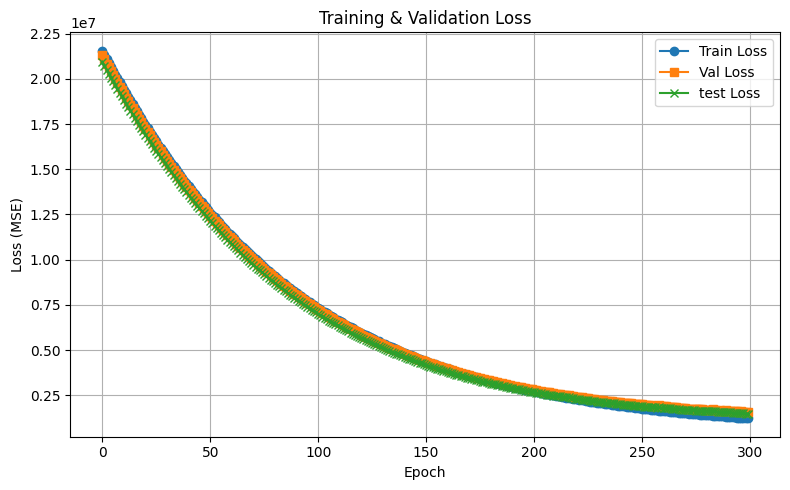

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(train_history["train_loss"], label="Train Loss", marker="o")
plt.plot(train_history["val_loss"], label="Val Loss", marker="s")
plt.plot(train_history["test_loss"], label="test Loss", marker='x')
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
import torch
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

model.load_state_dict(torch.load("best_lstm_model.pt"))
model.to(device)
model.eval()

def evaluate_model(loader, model, device):
    y_true, y_pred = [], []
    with torch.no_grad():
        for X, y in loader:
            X, y = X.to(device), y.to(device)
            preds = model(X).squeeze()
            y_true.extend(y.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    y_true, y_pred = np.array(y_true), np.array(y_pred)

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100  

    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "MAPE": mape}


val_metrics = evaluate_model(val_loader, model, device)
print("\n📊 Validation Set Metrics:")
for k, v in val_metrics.items():
    print(f"  {k}: {v:.6f}")

test_metrics = evaluate_model(test_loader, model, device)
print("\n📊 Test Set Metrics:")
for k, v in test_metrics.items():
    print(f"  {k}: {v:.6f}")


C:\Users\Suzreal\AppData\Local\Temp\ipykernel_14912\2330783964.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_lstm_model.pt"))



📊 Validation Set Metrics:
  MAE: 758.770203
  MSE: 1563535.375000
  RMSE: 1250.414062
  MAPE: 21.455202

📊 Test Set Metrics:
  MAE: 761.310791
  MSE: 1484396.125000
  RMSE: 1218.357910
  MAPE: 21.799813


In [12]:
model.eval()
all_preds = []
all_truths = []
all_dates = []  

with torch.no_grad():
    for X, y in tqdm(test_loader, desc="Collecting predictions"):
        X = X.to(device)
        preds = model(X).squeeze().cpu().numpy()
        y = y.cpu().numpy()

        all_preds.extend(preds)
        all_truths.extend(y)


y_pred = np.array(all_preds)
y_true = np.array(all_truths)

In [20]:
np.random.seed(42)
sample_indices = np.random.choice(len(y_true), size=500, replace=False)
y_true = y_true[sample_indices]
y_pred = y_pred[sample_indices]

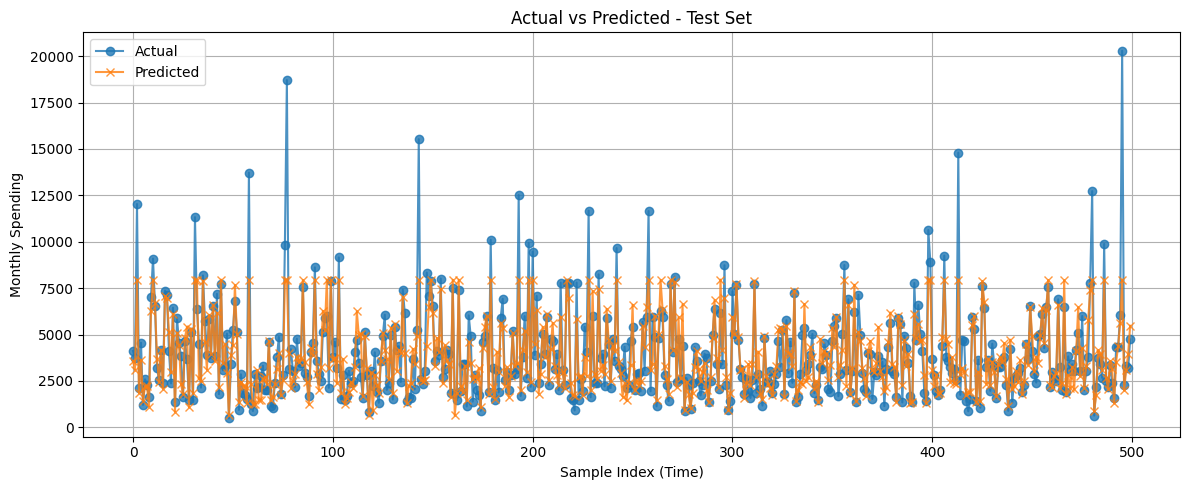

In [21]:
plt.figure(figsize=(12, 5))
plt.plot(y_true, label="Actual", marker='o', alpha=0.8)
plt.plot(y_pred, label="Predicted", marker='x', alpha=0.8)
plt.title("Actual vs Predicted - Test Set")
plt.xlabel("Sample Index (Time)")
plt.ylabel("Monthly Spending")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

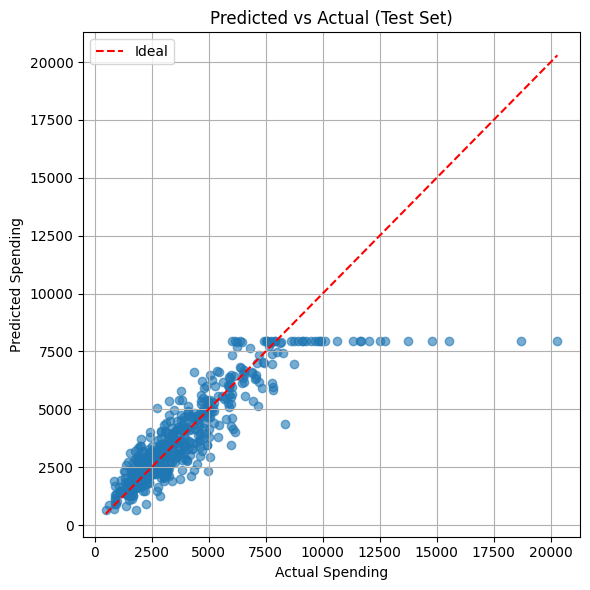

In [22]:
plt.figure(figsize=(6, 6))
plt.scatter(y_true, y_pred, alpha=0.6)
plt.plot([y_true.min(), y_true.max()],
         [y_true.min(), y_true.max()],
         'r--', label="Ideal")
plt.title("Predicted vs Actual (Test Set)")
plt.xlabel("Actual Spending")
plt.ylabel("Predicted Spending")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

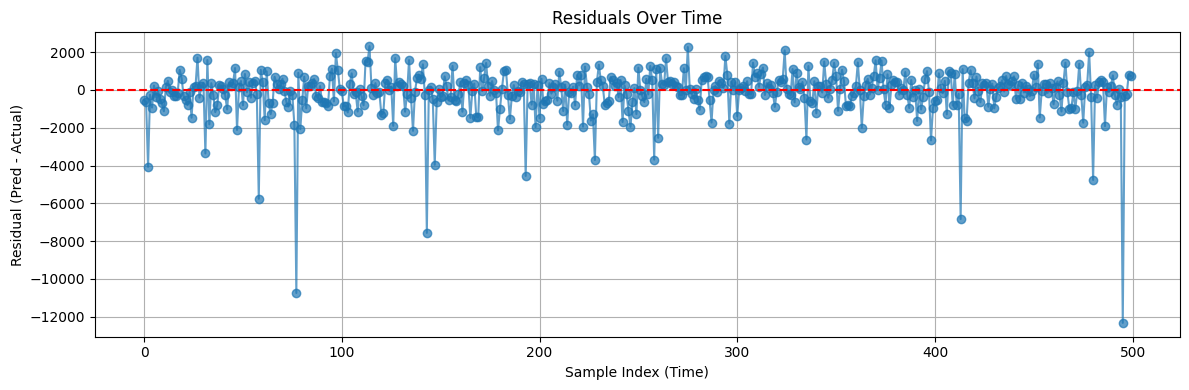

In [23]:
residuals = y_pred - y_true

plt.figure(figsize=(12, 4))
plt.plot(residuals, marker='o', alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals Over Time")
plt.xlabel("Sample Index (Time)")
plt.ylabel("Residual (Pred - Actual)")
plt.grid(True)
plt.tight_layout()
plt.show()

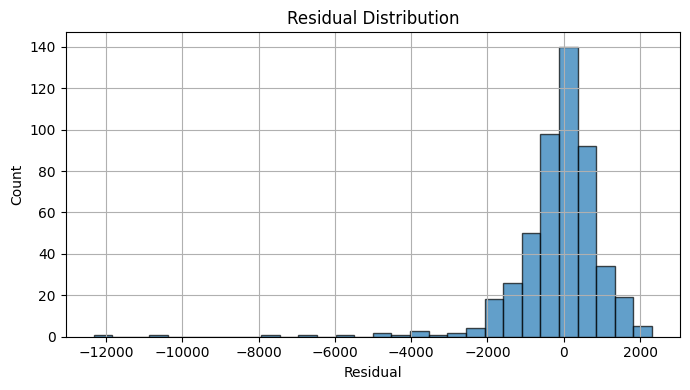

In [24]:
plt.figure(figsize=(7, 4))
plt.hist(residuals, bins=30, alpha=0.7, edgecolor='black')
plt.title("Residual Distribution")
plt.xlabel("Residual")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()